In [1]:
import models.channel_flow as chan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
torch.random.manual_seed(123)

In [2]:
# overall hypers
hypers = chan.get_hyperparams(ymin=-1, ymax=1, num_epochs=200000, lr=0.0001, 
                              num_layers=4, num_units=40, batch_size=1000)
y=np.linspace(-1,1,1000)
delta = (hypers['ymax']-hypers['ymin'])/2
reynolds_stress = chan.get_mixing_len_model(hypers['k'], delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])

## $Re_{tau} = 180$

In [3]:
dns_retau180 = pd.read_csv('data/LM_Channel_Retau180.txt', delimiter=' ')
numerical_u180 = np.load('data/mixlen_numerical_u180.npy')

hypers['nu']=0.005555555555

retau=chan.calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

half_u180,  half_y180 = chan.convert_dns(delta, hypers, dns_retau180)

Training at Retau=180.000000018


In [4]:
pdenn180 = chan.Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses180, pdenn180 = pdenn180.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 200/200 [00:05<00:00, 36.55it/s, loss=0.98]


In [5]:
# preds180 = np.load('data/preds_retau180_200k_epochs_2k_batchsize.npy')
preds180 = pdenn180.predict(torch.tensor(y.reshape(-1,1), dtype=torch.float)).detach().numpy()
np.save('data/mixlen_preds_u180.npy', preds180)

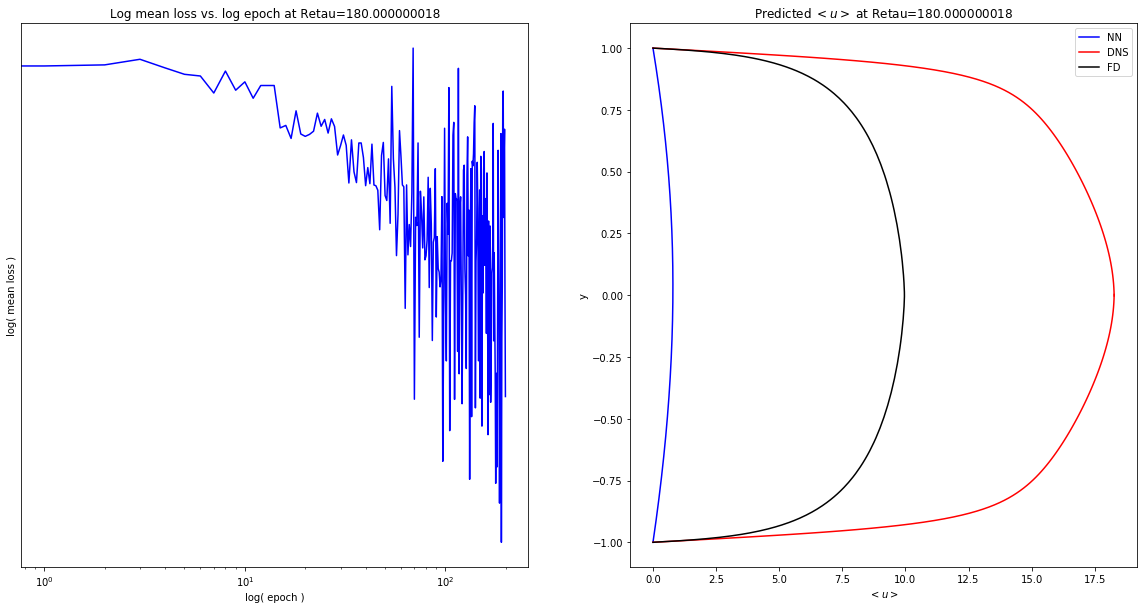

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
chan.make_plots(ax, losses180, pdenn180, hypers, retau)
chan.plot_dns(ax[1], half_u180, half_y180, delta)
ax[1].plot(numerical_u180, y, label='FD', color='black')
# ax[1].plot(preds180, y, label='NN', color='blue')
ax[1].legend()
plt.show()

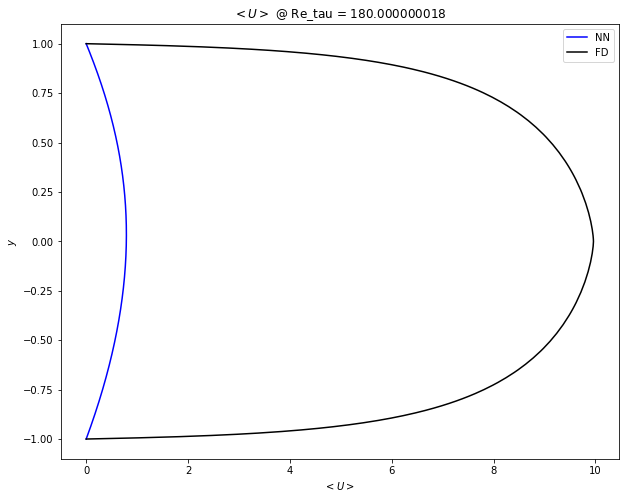

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(preds180, y, label='NN', color='blue')
ax.plot(numerical_u180, y, label='FD', color='black')
ax.set_title('$<U>$ @ Re_tau = {}'.format(retau))
ax.set_xlabel('$<U>$')
ax.set_ylabel('$y$')
ax.legend()
plt.show()

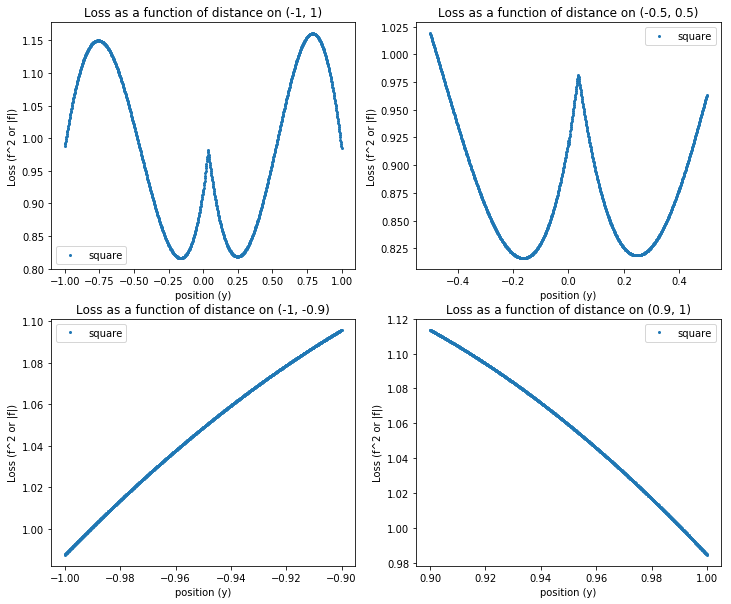

In [8]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
chan.loss_vs_distance(ax[0,0],  -1, 1, pdenn180, hypers, reynolds_stress)
chan.loss_vs_distance(ax[0,1], -.5, .5, pdenn180, hypers, reynolds_stress)
chan.loss_vs_distance(ax[1,0], -1, -.9, pdenn180, hypers, reynolds_stress)
chan.loss_vs_distance(ax[1,1], .9, 1, pdenn180, hypers, reynolds_stress)

## $Re_{tau} = 550$

In [9]:
dns_retau550 = pd.read_csv('data/LM_Channel_Retau550.txt', delimiter=' ')

numerical_u550 = np.load('data/mixlen_numerical_u550.npy')

hypers['nu']=0.001818181818
retau=chan.calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

half_u550,  half_y550 = chan.convert_dns(delta, hypers, dns_retau550)

Training at Retau=550.000000055


In [10]:
pdenn550 = chan.Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses550, pdenn550 = pdenn550.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 200/200 [00:05<00:00, 31.40it/s, loss=0.99]


In [11]:
preds550 = pdenn550.predict(torch.tensor(y.reshape(-1,1), dtype=torch.float)).detach().numpy()
np.save('data/mixlen_preds_u550.npy', preds550)

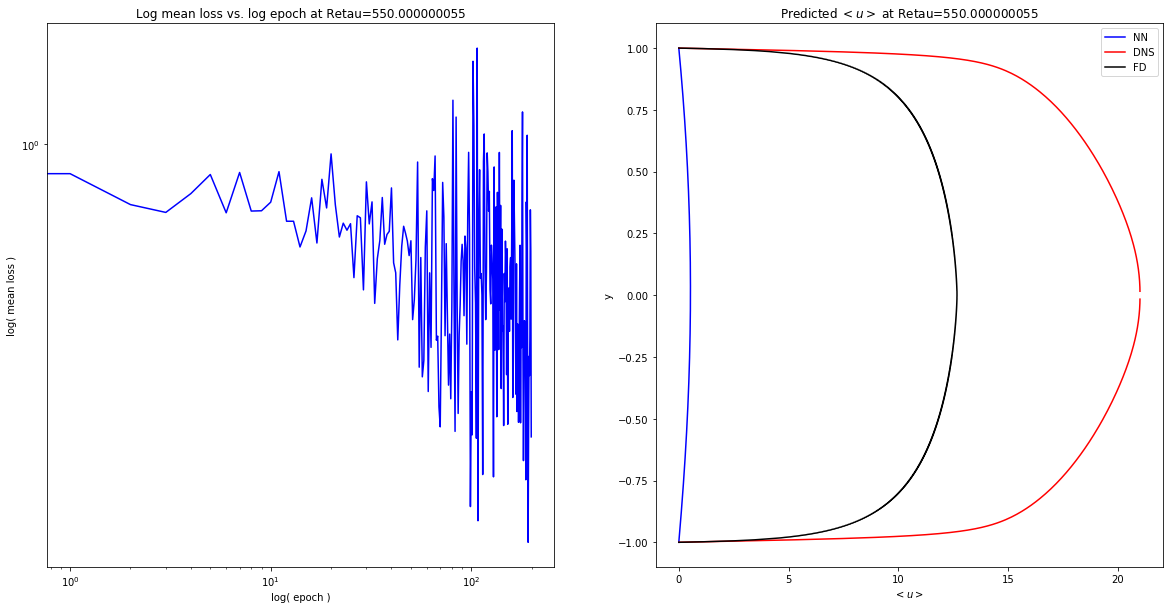

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
chan.make_plots(ax, losses550, pdenn550, hypers, retau)
chan.plot_dns(ax[1], half_u550, half_y550, delta)
# ax[1].plot(half_u550, half_y550)
ax[1].plot(numerical_u550, y, label='FD', color='black')
# ax[1].set_xlim(0,25)
# ax[1].plot(preds550, y, label='NN', color='blue')
ax[1].legend()
plt.show()

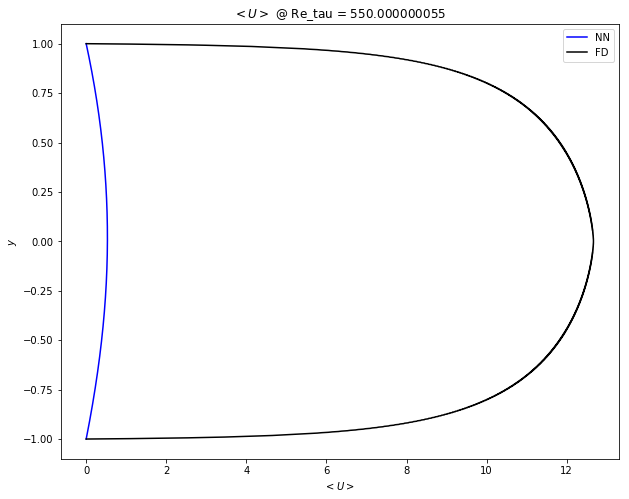

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(preds550, y, label='NN', color='blue')
ax.plot(numerical_u550, y, label='FD', color='black')
ax.set_title('$<U>$ @ Re_tau = {}'.format(retau))
ax.set_xlabel('$<U>$')
ax.set_ylabel('$y$')
ax.legend()
plt.show()

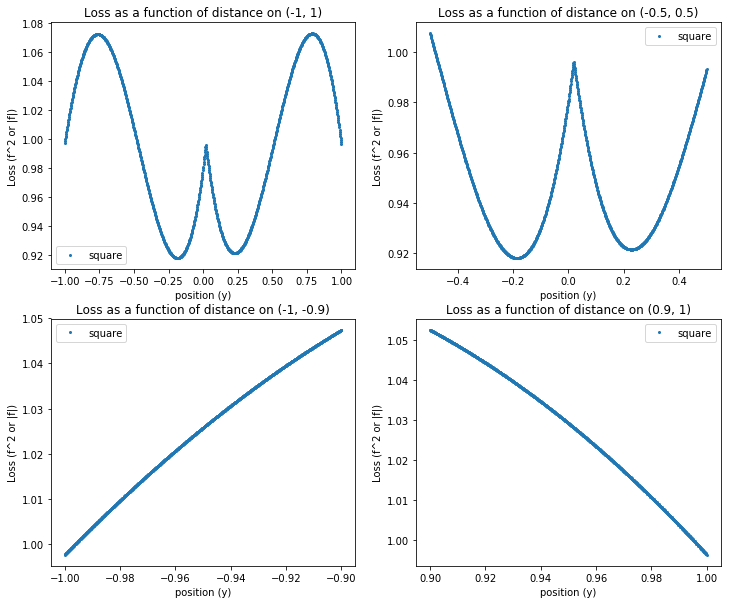

In [14]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
chan.loss_vs_distance(ax[0,0],  -1, 1, pdenn550, hypers, reynolds_stress)
chan.loss_vs_distance(ax[0,1], -.5, .5, pdenn550, hypers, reynolds_stress)
chan.loss_vs_distance(ax[1,0], -1, -.9, pdenn550, hypers, reynolds_stress)
chan.loss_vs_distance(ax[1,1], .9, 1, pdenn550, hypers, reynolds_stress)

## $Re_{tau} = 1000$

In [15]:
dns_retau1000 = pd.read_csv('data/LM_Channel_Retau1000.txt', delimiter=' ')

numerical_u1000 = np.load('data/mixlen_numerical_u1000.npy')

hypers['nu']=0.001
retau=chan.calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

half_u1000,  half_y1000 = chan.convert_dns(delta, hypers, dns_retau1000)

Training at Retau=1000.0


In [16]:
pdenn1000 = chan.Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses1000, pdenn1000 = pdenn1000.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 200/200 [00:05<00:00, 33.96it/s, loss=1]


In [17]:
preds1000 = pdenn1000.predict(torch.tensor(y.reshape(-1,1), dtype=torch.float)).detach().numpy()
np.save('data/mixlen_preds_u1000.npy', preds1000)

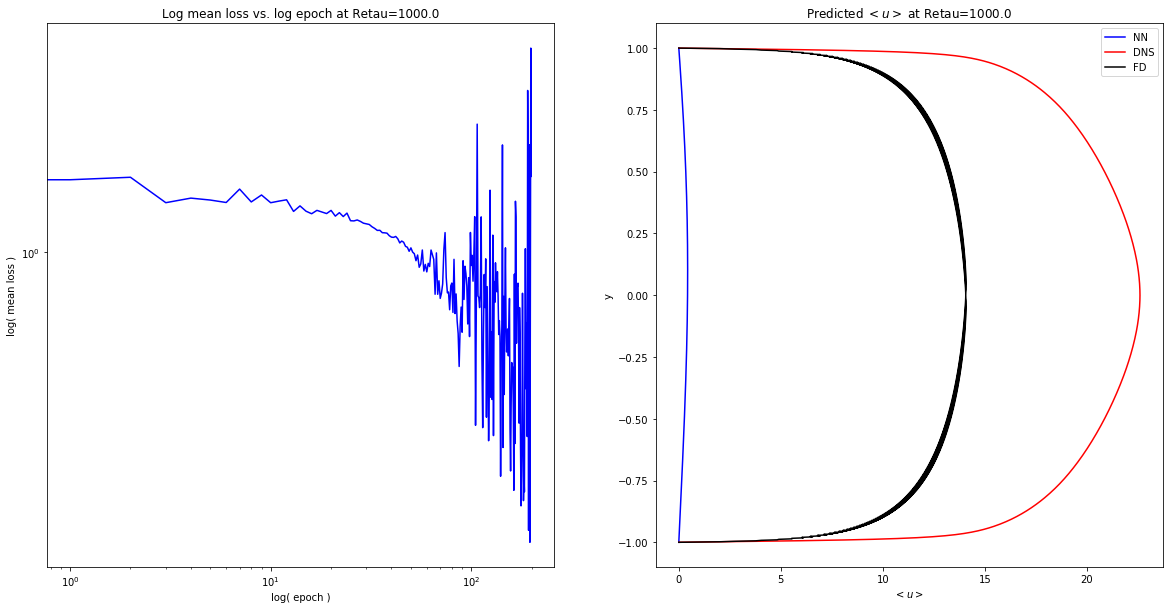

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
chan.make_plots(ax, losses1000, pdenn1000, hypers, retau)
chan.plot_dns(ax[1], half_u1000, half_y1000, delta)
ax[1].plot(numerical_u1000, y, label='FD', color='black')
# ax[1].plot(preds1000, y, label='NN', color='blue')
ax[1].legend()
plt.show()

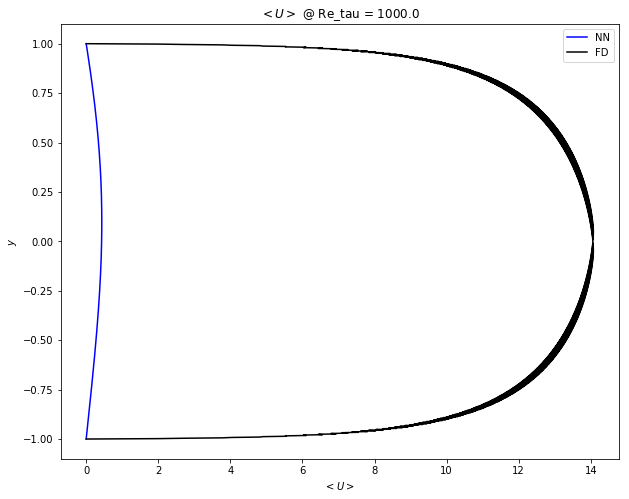

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(preds1000, y, label='NN', color='blue')
ax.plot(numerical_u1000, y, label='FD', color='black')
ax.set_title('$<U>$ @ Re_tau = {}'.format(retau))
ax.set_xlabel('$<U>$')
ax.set_ylabel('$y$')
ax.legend()
plt.show()

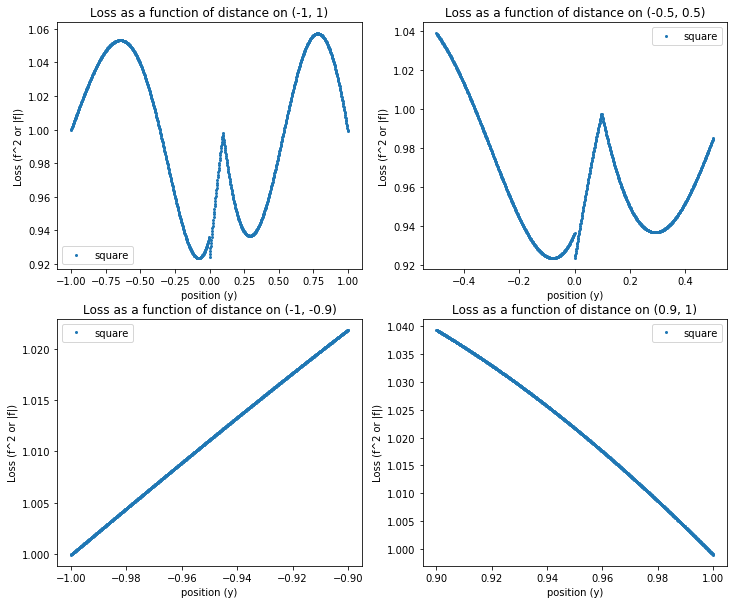

In [20]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
chan.loss_vs_distance(ax[0,0],  -1, 1, pdenn1000, hypers, reynolds_stress)
chan.loss_vs_distance(ax[0,1], -.5, .5, pdenn1000, hypers, reynolds_stress)
chan.loss_vs_distance(ax[1,0], -1, -.9, pdenn1000, hypers, reynolds_stress)
chan.loss_vs_distance(ax[1,1], .9, 1, pdenn1000, hypers, reynolds_stress)